# CNN İLE DEFTER VE TOP RESİMLERİNİN SINIFLANDIRILMASI

Projemin dropbox dosyası: https://www.dropbox.com/sh/l0i9h0yp7ry5gzd/AADyJP8m42Rhdq9SMhkkEGVAa?dl=0
Resimleri tek bir klasörden numaralarına göre(1-200 top, 201-400 defter şeklinde) aşağıdaki
kodlarla düzenleyerek çekeceğiz.

İlk olarak resimlerimizi düzenleyeceğiz.

In [1]:
import cv2
import numpy as np

In [2]:
def resmiklasordenal(dosyaadi):
    resim = cv2.imread("%s"%dosyaadi)
    return resim

In [3]:
girisverisi = np.array([])
for i in range(400):
    klasordenalinmisresim=0
    i = i+1
    string= 'veriseti/%s.jpg'%i
    klasordenalinmisresim =resmiklasordenal(string)
    boyutlandirilmisresim=cv2.resize(klasordenalinmisresim,(224,224))
    girisverisi=np.append(girisverisi,boyutlandirilmisresim)
    print(i +1)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

Resimlerimizi numaralarına göre teker teker klasörden çektik.Cv2 kullandık.

In [4]:
girisverisi= np.reshape(girisverisi,(-1,224,224,3))

In [5]:
np.save("girisverimiz", girisverisi)

In [6]:
print(girisverisi.shape)

(400, 224, 224, 3)


# Adım 1: CNN-MaxPool Olayı

In [7]:
import keras
import numpy as np

Using TensorFlow backend.


In [8]:
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras import *
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense,Activation,Conv2D,Dropout,MaxPooling2D
from keras.utils import to_categorical



In [9]:
girisverisi=np.load("girisverimiz.npy")

In [10]:
girisverisi=np.reshape(girisverisi,(-1,224,224,3))

verilerimi şekillendirdim.

In [11]:
girisverisi= girisverisi/255

In [12]:
cikisverisi=np.array([[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],])

Verilerimi 0 ve 1 ile etiketledim.

In [13]:
splitverisi=girisverisi[1:51]

doğrulama verilerime her nesne için 50 adet görsel ayırdım(toplamda 100 görsel doğrulamaya ayrıldı).
yine her nesne için 150 görsel eğitim yaparken kullanıyorum.(toplamda 300 eğitim görseli)

İlk 50 görsel toplarım için doğrulama görseli olarak ayrıldı.

In [14]:
splitverisi=np.append(splitverisi,girisverisi[350:401])

Son 50 görsel ise defterlerim için doğrulama görseli olarak ayrıldı ve topların doğrulama verilerinin üzerine eklendi.

In [15]:
splitverisi=splitverisi.reshape(-1,224,224,3)

In [16]:
splitcikis=np.array([[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],])

doğrulama için kullanacağım verilerimi split verisi olarak adlandırdım ve onlarıda 0 ve 1 şeklinde etiketledim.

In [17]:
model =Sequential()

Burdan itibaren CNN modelimi oluşturuyorum.

In [18]:
model.add(layers.Conv2D(50,11, strides=(4,4),input_shape=(224,224,3)))
model.add(layers.Conv2D(50,2))
model.add(layers.Conv2D(50,2))
model.add(layers.Conv2D(50,2))
model.add(layers.Conv2D(50,2))
model.add(layers.Conv2D(50,3))
model.add(layers.Conv2D(50,2))
model.add(layers.Conv2D(50,2))
model.add(layers.Conv2D(50,2))
model.add(layers.MaxPooling2D((5,5)))
model.add(layers.Conv2D(50,2))
model.add(layers.Conv2D(50,2))
model.add(layers.Conv2D(50,2))
model.add(layers.MaxPooling2D((3,3)))
model.add(layers.Conv2D(50,2))

In [19]:
model.add(Flatten())

In [20]:
model.add(layers.Dense(200,activation='relu'))
model.add(layers.Dense(200,activation='relu'))
model.add(layers.Dense(2))
model.add(Activation ('softmax'))


In [21]:
 model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=0.00001), metrics= ['acc'])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 54, 54, 50)        18200     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 53, 53, 50)        10050     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 50)        10050     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 51, 51, 50)        10050     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 50)        10050     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 48, 48, 50)        22550     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 47, 47, 50)       

In [23]:
history=model.fit(girisverisi,cikisverisi, batch_size=2, epochs=30, validation_data=(splitverisi,splitcikis))

Train on 400 samples, validate on 100 samples
Epoch 1/30
400/400 [==============================] - 15s 37ms/step - loss: 0.6700 - acc: 0.5775 - val_loss: 0.6485 - val_acc: 0.7600
Epoch 2/30
400/400 [==============================] - 14s 34ms/step - loss: 0.6089 - acc: 0.7325 - val_loss: 0.5494 - val_acc: 0.8100
Epoch 3/30
400/400 [==============================] - 14s 34ms/step - loss: 0.5091 - acc: 0.7875 - val_loss: 0.4583 - val_acc: 0.7700
Epoch 4/30
400/400 [==============================] - 13s 34ms/step - loss: 0.4543 - acc: 0.8150 - val_loss: 0.4357 - val_acc: 0.8200
Epoch 5/30
400/400 [==============================] - 13s 34ms/step - loss: 0.4271 - acc: 0.8250 - val_loss: 0.4623 - val_acc: 0.7900
Epoch 6/30
400/400 [==============================] - 14s 35ms/step - loss: 0.4082 - acc: 0.8425 - val_loss: 0.4861 - val_acc: 0.7800
Epoch 7/30
400/400 [==============================] - 14s 34ms/step - loss: 0.3930 - acc: 0.8300 - val_loss: 0.4147 - val_acc: 0.8000
Epoch 8/30
400/4

In [24]:
import matplotlib.pyplot as plt

In [25]:
acc = history.history['acc']
val_acc =history.history['val_acc']
loss=history.history['loss']
val_loss = history.history['val_loss']


In [26]:
epochs=range(len(acc))

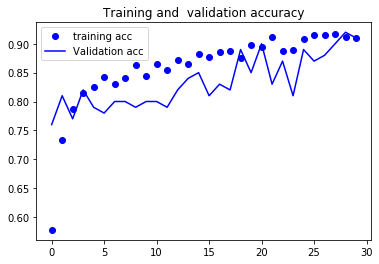

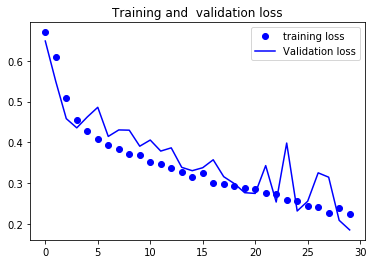

In [27]:
plt.plot(epochs,acc, 'bo', label= 'training acc')
plt.plot(epochs, val_acc,'b', label= 'Validation acc')
plt.title('Training and  validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label= 'training loss')
plt.plot(epochs, val_loss,'b', label= 'Validation loss')
plt.title('Training and  validation loss')
plt.legend()

plt.show()

# Grafik Yorumu
Modelimiz verisetinin azlığı vb. gibi durumlar sebebiyle verileri ezberlemiş yani overfitting yapmış.Overfit sebebiyle
değerleri net bir şekilde bilmiş ve accuracy değeri olarak da 0.9175' lere kadar yükselmiştir.

In [28]:
model.save("versiyonbir")

# Adım2: Data Augmentation Etkisi

In [29]:
from keras.preprocessing.image import ImageDataGenerator

In [30]:
datagen= ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

Verisetimizin azlığından kaynaklanan overfitting problemini çözmek amacıyla verilerimizi arttıracağız.
Verdiğimiz parametrelerle resmimizi 40 derece döndürmek,yatay ve dikey olarak çevirmek gibi işlemler yapıyoruz.

In [31]:
datagen.fit(girisverisi)

Eğitim datamızı augmente edeceğiz sadece, validation datasına uygulamayacağız.

In [32]:
history=model.fit_generator(datagen.flow(girisverisi,cikisverisi,batch_size=4),
                    epochs=100,
                    validation_data=(splitverisi,splitcikis),
                    workers=4)
                

Epoch 1/100
100/100 [==============================] - 12s 118ms/step - loss: 0.9277 - acc: 0.6325 - val_loss: 0.2481 - val_acc: 0.8600
Epoch 2/100
100/100 [==============================] - 12s 122ms/step - loss: 0.6836 - acc: 0.6550 - val_loss: 0.3234 - val_acc: 0.8700
Epoch 3/100
100/100 [==============================] - 12s 123ms/step - loss: 0.5637 - acc: 0.7300 - val_loss: 0.3305 - val_acc: 0.8500
Epoch 4/100
100/100 [==============================] - 12s 121ms/step - loss: 0.5615 - acc: 0.7075 - val_loss: 0.3953 - val_acc: 0.8200
Epoch 5/100
100/100 [==============================] - 12s 121ms/step - loss: 0.5767 - acc: 0.7350 - val_loss: 0.3323 - val_acc: 0.8500
Epoch 6/100
100/100 [==============================] - 12s 121ms/step - loss: 0.5465 - acc: 0.7375 - val_loss: 0.3363 - val_acc: 0.8500
Epoch 7/100
100/100 [==============================] - 12s 121ms/step - loss: 0.5460 - acc: 0.7250 - val_loss: 0.3214 - val_acc: 0.8600
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 12s 120ms/step - loss: 0.4609 - acc: 0.7825 - val_loss: 0.3368 - val_acc: 0.8200
Epoch 62/100
100/100 [==============================] - 12s 119ms/step - loss: 0.4597 - acc: 0.7825 - val_loss: 0.4436 - val_acc: 0.7900
Epoch 63/100
100/100 [==============================] - 12s 119ms/step - loss: 0.4863 - acc: 0.7925 - val_loss: 0.3347 - val_acc: 0.8400
Epoch 64/100
100/100 [==============================] - 12s 120ms/step - loss: 0.4510 - acc: 0.7850 - val_loss: 0.4363 - val_acc: 0.8000
Epoch 65/100
100/100 [==============================] - 12s 122ms/step - loss: 0.4584 - acc: 0.7900 - val_loss: 0.3319 - val_acc: 0.8400
Epoch 66/100
100/100 [==============================] - 12s 119ms/step - loss: 0.4559 - acc: 0.7975 - val_loss: 0.3363 - val_acc: 0.8300
Epoch 67/100
100/100 [==============================] - 12s 119ms/step - loss: 0.4935 - acc: 0.7750 - val_loss: 0.3444 - val_acc: 0.8500
Epoch 68/100
100/100 [===================

In [33]:
acc = history.history['acc']
val_acc =history.history['val_acc']
loss=history.history['loss']
val_loss = history.history['val_loss']


In [34]:
epochs=range(len(acc))

In [35]:
import matplotlib.pyplot as plt

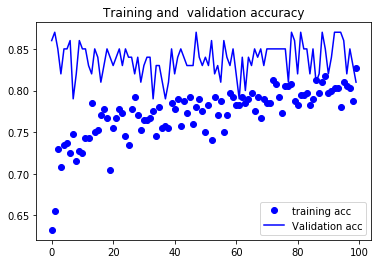

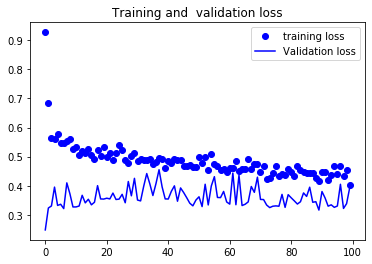

In [36]:
plt.plot(epochs,acc, 'bo', label= 'training acc')
plt.plot(epochs, val_acc,'b', label= 'Validation acc')
plt.title('Training and  validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label= 'training loss')
plt.plot(epochs, val_loss,'b', label= 'Validation loss')
plt.title('Training and  validation loss')
plt.legend()

plt.show()



# Grafik Yorumu 
Artık overfitting problemi bir önceki aşamadan daha az gözleniyor. Model ezber yapmadığı için nokta atışı tahminlerde bulunamadı.
Dolayısıyla accuracy değerlerimiz ilk aşamaya göre biraz düşüş yaşadı.

In [37]:
model.save("versiyoniki")

 # Adım 3: Augmentation ve Dropout etkisi

In [38]:
model =Sequential()
model.add(layers.Conv2D(50,11, strides=(4,4),input_shape=(224,224,3)))
model.add(layers.Conv2D(50,2))
model.add(layers.Conv2D(50,2))
model.add(layers.Conv2D(50,2))
model.add(layers.Conv2D(50,2))
model.add(layers.Conv2D(50,3))
model.add(layers.Conv2D(50,2))
model.add(layers.Conv2D(50,2))
model.add(layers.Conv2D(50,2))
model.add(layers.MaxPooling2D((5,5)))
model.add(layers.Conv2D(50,2))
model.add(layers.Conv2D(50,2))
model.add(layers.Conv2D(50,2))
model.add(layers.MaxPooling2D((3,3)))
model.add(layers.Conv2D(50,2))

In [39]:
model.add(Flatten())

In [40]:
model.add(layers.Dense(200,activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(200,activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(2))
model.add(Activation ('softmax'))

Artık modelimize augmentation üzerine bir de dropout ekliyoruz.
Dropout işlemini bazı nöronları unutup,overfittingi önlemek için gerçekleştiriyoruz.

In [43]:
 model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=0.00001), metrics= ['acc'])

In [44]:
from keras.preprocessing.image import ImageDataGenerator

In [45]:
datagen= ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,)

In [46]:
datagen.fit(girisverisi)

In [47]:
history=model.fit_generator(datagen.flow(girisverisi,cikisverisi,batch_size=4),
                    epochs=100,
                    validation_data=(splitverisi,splitcikis),
                    workers=4)
                

Epoch 1/100
100/100 [==============================] - 12s 118ms/step - loss: 0.6942 - acc: 0.4825 - val_loss: 0.6774 - val_acc: 0.6600
Epoch 2/100
100/100 [==============================] - 12s 115ms/step - loss: 0.6885 - acc: 0.5300 - val_loss: 0.6713 - val_acc: 0.6100
Epoch 3/100
100/100 [==============================] - 12s 116ms/step - loss: 0.6787 - acc: 0.5550 - val_loss: 0.6762 - val_acc: 0.6300
Epoch 4/100
100/100 [==============================] - 12s 117ms/step - loss: 0.6767 - acc: 0.5750 - val_loss: 0.6635 - val_acc: 0.7000
Epoch 5/100
100/100 [==============================] - 12s 118ms/step - loss: 0.6730 - acc: 0.5900 - val_loss: 0.6522 - val_acc: 0.6900
Epoch 6/100
100/100 [==============================] - 12s 119ms/step - loss: 0.6550 - acc: 0.6225 - val_loss: 0.6494 - val_acc: 0.6800
Epoch 7/100
100/100 [==============================] - 12s 118ms/step - loss: 0.6675 - acc: 0.5825 - val_loss: 0.6445 - val_acc: 0.6500
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 12s 120ms/step - loss: 0.5019 - acc: 0.7350 - val_loss: 0.4906 - val_acc: 0.7900
Epoch 62/100
100/100 [==============================] - 12s 119ms/step - loss: 0.5152 - acc: 0.7375 - val_loss: 0.5094 - val_acc: 0.7700
Epoch 63/100
100/100 [==============================] - 12s 121ms/step - loss: 0.5532 - acc: 0.7275 - val_loss: 0.4883 - val_acc: 0.7900
Epoch 64/100
100/100 [==============================] - 12s 120ms/step - loss: 0.5301 - acc: 0.7350 - val_loss: 0.5168 - val_acc: 0.7500
Epoch 65/100
100/100 [==============================] - 12s 122ms/step - loss: 0.4943 - acc: 0.7450 - val_loss: 0.4939 - val_acc: 0.7800
Epoch 66/100
100/100 [==============================] - 12s 121ms/step - loss: 0.5256 - acc: 0.7500 - val_loss: 0.4971 - val_acc: 0.7800
Epoch 67/100
100/100 [==============================] - 12s 120ms/step - loss: 0.5188 - acc: 0.7325 - val_loss: 0.5214 - val_acc: 0.7400
Epoch 68/100
100/100 [===================

In [48]:
acc = history.history['acc']
val_acc =history.history['val_acc']
loss=history.history['loss']
val_loss = history.history['val_loss']


In [49]:
epochs=range(len(acc))

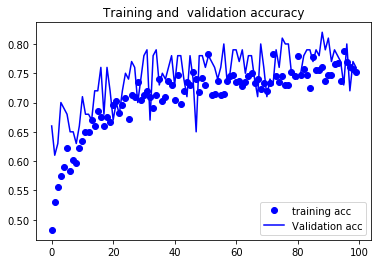

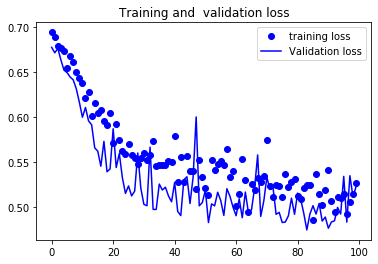

In [50]:
plt.plot(epochs,acc, 'bo', label= 'training acc')
plt.plot(epochs, val_acc,'b', label= 'Validation acc')
plt.title('Training and  validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label= 'training loss')
plt.plot(epochs, val_loss,'b', label= 'Validation loss')
plt.title('Training and  validation loss')
plt.legend()

plt.show()

# Grafik Yorumu
Artık modelimiz data augmentation+dropout etkisiyle overfittingi azalttı ve iyi tahminler yapmaya başladı.

In [51]:
model.save("versiyonüc")

# Adım 4: Erken Kesme Etkisi

In [59]:
history=model.fit_generator(datagen.flow(girisverisi,cikisverisi,batch_size=4),
                    epochs=6,
                    validation_data=(splitverisi,splitcikis),
                    workers=4)

Epoch 1/6
100/100 [==============================] - 12s 124ms/step - loss: 0.4937 - acc: 0.7875 - val_loss: 0.4723 - val_acc: 0.7800
Epoch 2/6
100/100 [==============================] - 12s 122ms/step - loss: 0.4964 - acc: 0.7750 - val_loss: 0.4896 - val_acc: 0.7800
Epoch 3/6
100/100 [==============================] - 12s 122ms/step - loss: 0.4852 - acc: 0.7475 - val_loss: 0.5034 - val_acc: 0.7700
Epoch 4/6
100/100 [==============================] - 12s 121ms/step - loss: 0.4856 - acc: 0.7700 - val_loss: 0.4960 - val_acc: 0.7700
Epoch 5/6
100/100 [==============================] - 12s 121ms/step - loss: 0.5088 - acc: 0.7475 - val_loss: 0.4704 - val_acc: 0.8100
Epoch 6/6
100/100 [==============================] - 12s 122ms/step - loss: 0.4747 - acc: 0.7775 - val_loss: 0.4662 - val_acc: 0.7900


In [60]:
acc = history.history['acc']
val_acc =history.history['val_acc']
loss=history.history['loss']
val_loss = history.history['val_loss']


In [61]:
epochs=range(len(acc))

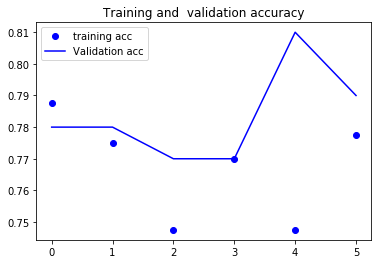

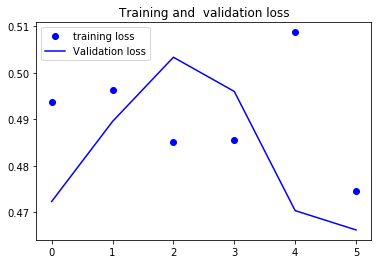

In [62]:
plt.plot(epochs,acc, 'bo', label= 'training acc')
plt.plot(epochs, val_acc,'b', label= 'Validation acc')
plt.title('Training and  validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label= 'training loss')
plt.plot(epochs, val_loss,'b', label= 'Validation loss')
plt.title('Training and  validation loss')
plt.legend()

plt.show()

# Grafik Yorumu

Modelimizin başarısını göz önünde bulundurarak, overfitting olayının önüne geçmek adına erken bir epoch sayısında
modelimizin eğitimini durdurduk.Böylelikle daha başarılı bir sonuç ve grafik elde etmiş olduk.

In [63]:
model.save("versiyondört")

# Genel Yorum

Derin öğrenme projeleri genellikle büyük verisetleri ile çalıştığı zaman daha iyi sonuçlar vermektedir.Bu sebeple ilk adımımızda(veri seti yetersizliği sebebiyle) modelimiz direkt ezberleme yöntemine başvurdu.Daha sonra data augmentation ile elimizdeki verisetini genişlettiğimiz için daha başarılı sonuçlar elde etmeye başladık ve bunun üzerine dropout etkisi de eklediğimizde modelimiz ideala biraz daha yaklaşmış oldu. Son olarak epoch sayısını overfittinge başlamadan kesmemiz model adına daha iyi sonuçlar üretti.